In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
file1 = open('ob-la-di_ob-la-da.txt', 'r')

pos = 0;
neg = 0;
neu = 0;
lines = 0;
 
# Rating each line
for line in file1:
    b = line.strip()
    tb = TextBlob(b)
    score = tb.sentiment
    if b != "" :
        lines += 1
        print("{}\n {}".format(b, score))
    
        # depending on trends throughout files, I may adjust these markers (0.2 and -0.2)
    
        if tb.sentiment.polarity >= 0.2 :
            print(" Positive")
            pos += 1
 
        elif tb.sentiment.polarity <= - 0.2 :
            print(" Negative")
            neg += 1
 
        else :
            print(" Neutral")
            neu += 1
 
# Closing file(s)
file1.close()

Desmond has a barrow in the marketplace
 Sentiment(polarity=0.0, subjectivity=0.0)
 Neutral
Molly is the singer in a band
 Sentiment(polarity=0.0, subjectivity=0.0)
 Neutral
Desmond says to Molly, "Girl, I like your face"
 Sentiment(polarity=0.0, subjectivity=0.0)
 Neutral
And Molly says this as she takes him by the hand
 Sentiment(polarity=0.0, subjectivity=0.0)
 Neutral
Ob-la-di, ob-la-da
 Sentiment(polarity=0.0, subjectivity=0.0)
 Neutral
Life goes on, bra
 Sentiment(polarity=0.0, subjectivity=0.0)
 Neutral
La-la, how the life goes on
 Sentiment(polarity=0.0, subjectivity=0.0)
 Neutral
Ob-la-di, ob-la-da
 Sentiment(polarity=0.0, subjectivity=0.0)
 Neutral
Life goes on, bra
 Sentiment(polarity=0.0, subjectivity=0.0)
 Neutral
La-la, how the life goes on
 Sentiment(polarity=0.0, subjectivity=0.0)
 Neutral
Desmond takes a trolley to the jeweler's store
 Sentiment(polarity=0.0, subjectivity=0.0)
 Neutral
Buys a twenty carat golden ring (rin-ring)
 Sentiment(polarity=0.3, subjectivity=0.5

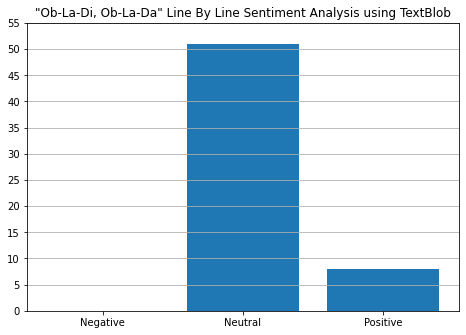

In [3]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lbls = ['Negative', 'Neutral', 'Positive']
compounds = [neg, neu, pos]
ax.bar(lbls, compounds)
ax.set_title('"Ob-La-Di, Ob-La-Da" Line By Line Sentiment Analysis using TextBlob')
ax.set_yticks(np.arange(0, lines, 5))
ax.grid(axis='y')
plt.show()

In [4]:
# The following code calculates the net sentiment rate (NSR) of the song overall, rather than considering it line by line
file1 = open('ob-la-di_ob-la-da.txt', 'r')

nsr = np.zeros(lines + 1, dtype=float) # a 1x15 array (0:14 lines)
lines = 0
polarity = 0 

for line in file1:
    b = line.strip()
    tb = TextBlob(b)
    
    if b != '' :
        lines += 1
        
        # add polarity scores of all lines to evaluate song as a whole later
        polarity += tb.sentiment.polarity 
    
        # add net sentiment rate per line to vector
        nsr[lines] = polarity / lines
    
# Closing file(s)
file1.close()

In [6]:
print(nsr[lines]) # the final calculation of Net Sentiment Rate

0.05762711864406779


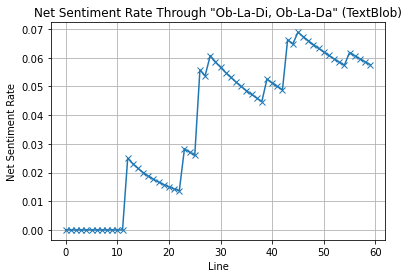

In [5]:
plt.plot(nsr, marker = 'x')
plt.title('Net Sentiment Rate Through "Ob-La-Di, Ob-La-Da" (TextBlob)')
plt.xlabel('Line')
plt.ylabel('Net Sentiment Rate')
plt.grid(True)
plt.show()